In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

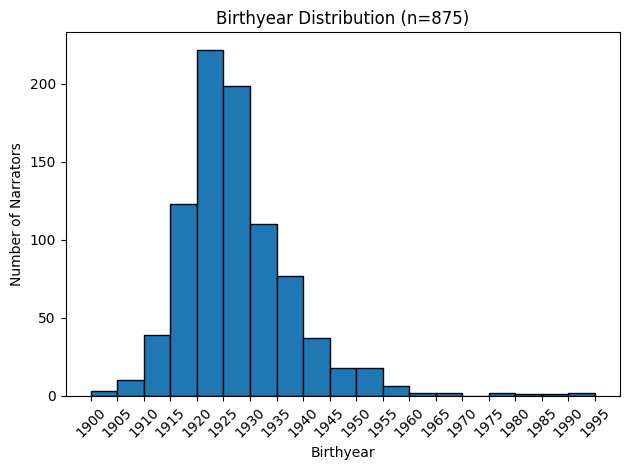

In [40]:
'''
PLOT BIRTH YEARS OF NARRATORS
'''
with open('metadata/bios.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    years = []
    
    for row in csv_reader:
        year = row["Birthyear"]
        if year:
            years.append(int(year))

# Plot the histogram
plt.hist(years, bins=np.arange(1900, 2000, 5), edgecolor='black')

# Set x-ticks for the decades (e.g., 1930, 1940, etc.)
decades = np.arange(1900, 2000, 5)
plt.xticks(decades)
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Birthyear')
plt.ylabel('Number of Narrators')
plt.title(f"Birthyear Distribution (n={len(years)})")

# Adjust the layout so everything fits
plt.tight_layout()

# Show the plot
plt.show()


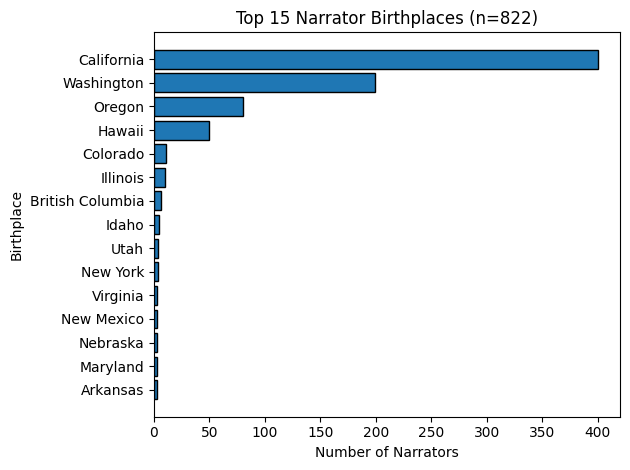

In [58]:
'''
PLOT NARRATOR BIRTHPLACE
'''
with open('metadata/bios.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    states_all = []
    
    for row in csv_reader:
        state = row["State"]
        if state:
            states_all.append(state)

# Count the occurrences of each state
state_counts = Counter(states_all)

# Get the top 15 states by count, sorted in descending order
top_15_states = sorted(state_counts.most_common(15), key=lambda x: x[1]) 
states, counts = zip(*top_15_states)  # Separate states and counts into two lists

# Plot the histogram as a horizontal bar chart for better readability
plt.barh(states, counts, edgecolor='black')

# Add labels and title
plt.xlabel('Number of Narrators')
plt.ylabel('Birthplace')
plt.title(f"Top 15 Narrator Birthplaces (n={len(states_all)})")

# Adjust the layout so everything fits
plt.tight_layout()

# Show the plot
plt.show()

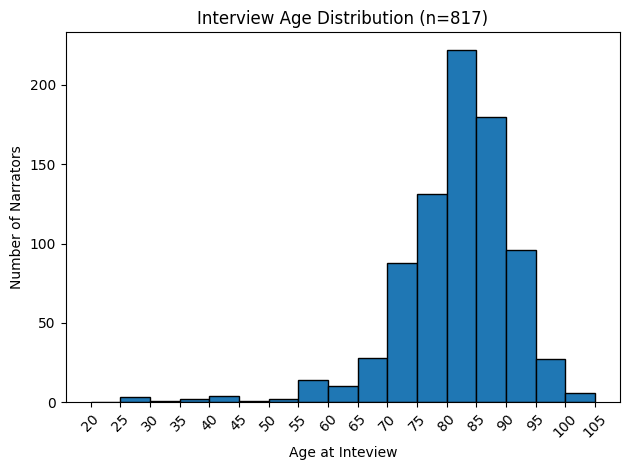

In [95]:
'''
PLOT AGE OF NARRATORS AT INTERVIEW
'''
people = {}
with open('metadata/bios.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        if row["Birthyear"].isdigit():
            people[row["Narrator"]] = {"Birthyear": int(row["Birthyear"])}
 
ct=0
with open("metadata.csv", 'r') as file:
    csv_reader = csv.DictReader(file)

    for row in csv_reader:
        narrators = row["Narrator"].split(',')
        for narrator in narrators:
            if narrator in people.keys():
                if row["Date"][-4:].isdigit():
                    people[narrator]["Interview Year"] = int(row["Date"][-4:])
            else: 
                # print("Narrator ", narrator, "not found in bios.csv")
                ct+=1
              
ages = []
for person in people:
    person_data = people[person]
    if "Interview Year" in person_data and "Birthyear" in person_data:
        age = person_data["Interview Year"] - person_data["Birthyear"]
        ages.append(age)

# Plot the histogram
plt.hist(ages, bins=np.arange(20, 110, 5), edgecolor='black')

# Set x-ticks for the decades (e.g., 1930, 1940, etc.)
decades = np.arange(20, 110, 5)
plt.xticks(decades)
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Age at Interview')
plt.ylabel('Number of Narrators')
plt.title(f"Interview Age Distribution (n={len(ages)})")

plt.tight_layout()
plt.show()


In [2]:
def get_speaker_counts(filename):
    with open(filename, 'r') as file:
        speakers = {}
        for line in file:
            initials = line[:6].split(": ")[0]
            if not initials:
                print("No initials found in a line of ", filename)
            elif initials in speakers.keys():
                speakers[initials] += len(line.split()) -1
            else:
                speakers[initials] = len(line.split()) -1
    return speakers
            